Some typical NumPy 'random' functions:

In [5]:
import numpy as np

# To generate a random float values between 0 and 1 (exclusive)
print(np.random.rand(3, 2)) # Creates a 3 x 2 matrix of random float values between 0 and 1 (exclusive)

# To generate random float values from standard normal distribution (mean = 0 and std = 1)
print(np.random.randn(5)) # Generates 5 random float values from standard normal distribution

# To generate random integer values within a range of values
print(np.random.randint(1, 100, 10)) # Generates 10 random integer values between 1 and 100 (exclusive)

# To randomly select an element from a given list of elements
print(np.random.choice([1, 2, 3, 4, 5, 6, 7, 8, 9], size=3)) # Three random numbers from the given array will be chosen

# To generate a random sample of values from a normally distributed with a specified mean and standard deviation
print(np.random.normal(loc=0, scale=1, size=10)) # 10 random values will be generated from a normally distributed data where 0 (loc) is the mean and 1 (scale) is the standard deviation

# To set a seed for a random number generation to ensure you get the same results later as well
print(np.random.seed(42)) # This ensures that any random numbers generated in the program are same every time you run the program. The seed value '42' can be any other value

[[0.92757859 0.81764415]
 [0.25990199 0.97581801]
 [0.11917334 0.39724046]]
[ 0.15780734 -0.72936686 -1.26000708  0.67265113  2.04090439]
[16 88 21 92  6 57 81 14 78  6]
[8 1 3]
[-0.10528008  0.62260879  0.02549762  1.25402877  1.38779601  1.31066268
 -0.09172685 -0.31853468 -0.52649989  0.47456881]
None


AIM #1: Generate a very large dataset
1. Generate a dataset of 1 million random data items between 1 and 100 items using only pandas
2. Generate a dataset of 1 million random data items between 1 and 100 using only NumPy
3. Calculate the time it takes for both the above operations. 
    3.1. Import the 'time' module, and use the time() function to calculate current time
    3.2. Which one is faster and why?

In [1]:
import pandas as pd
import numpy as np
import time

start_time_pandas = time.time()
pandas_data = pd.DataFrame(np.random.randint(1, 101, size=(1000000, 1)), columns=['Random_Data'])
end_time_pandas = time.time()
pandas_time = end_time_pandas - start_time_pandas

start_time_numpy = time.time()
numpy_data = np.random.randint(1, 101, size=1000000)
end_time_numpy = time.time()
numpy_time = end_time_numpy - start_time_numpy

print(f"Pandas Takes: {pandas_time} seconds")
print(f"NumPy Takes: {numpy_time} seconds")
# NumPy is faster than Pandas because NumPy is a low-level library dedicated to efficient numerical computations, while Pandas is a high-level library built on top of NumPy and provides more data manipulation features, resulting in additional overhead.

Pandas Takes: 0.010347366333007812 seconds
NumPy Takes: 0.007974863052368164 seconds


AIM #2: Basic statistics
For the given dataset on sleep health and lifestyle, do the following
1. Using only pandas, load the dataset, calculate mean 'Sleep Duration', 'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Heart Rate' and 'Daily Steps'.
2. Do the same as in Step 1 using only NumPy
3. Using only pandas, first calculate correlation (across only the numerical variables), and then separate correlation between...
    Sleep duration and Age
    Sleep duration and Heart rate
    Sleep duration and Daily steps
4. Using only NumPy, do the same as Step 3
5. Using pandas only, calculate standard deviation for 'Sleep Duration'. 
6. Usiong NumPy only, calculate standard deviation for 'Sleep Duration'. 
7. Calculate the time difference between using pandas and NumPy, right from the step of loading the dataset to the final standard deviation step. 
    5.1. Which one is faster and why?

In [2]:
import pandas as pd
import numpy as np
import time

file_path = 'sleep_health.csv'

start_time_pandas = time.time()

pandas_data = pd.read_csv(file_path)
pandas_means = pandas_data[['Sleep Duration', 'Systolic blood pressure', 'Diastolic blood pressure', 'Heart Rate', 'Daily Steps']].mean()

numeric_data = pandas_data.select_dtypes(include=[np.number])
pandas_corr = numeric_data.corr()

corr_sleep_age = pandas_corr.loc['Sleep Duration', 'Age']
corr_sleep_hr = pandas_corr.loc['Sleep Duration', 'Heart Rate']
corr_sleep_steps = pandas_corr.loc['Sleep Duration', 'Daily Steps']

pandas_std_sleep_duration = pandas_data['Sleep Duration'].std()

end_time_pandas = time.time()
pandas_time = end_time_pandas - start_time_pandas

start_time_numpy = time.time()

numpy_data = np.genfromtxt(file_path, delimiter=',', skip_header=1)  # Assuming the first row is a header
mean_sleep_duration = np.mean(numpy_data[:, 4])
mean_systolic_bp = np.mean(numpy_data[:, 9])
mean_diastolic_bp = np.mean(numpy_data[:, 10])
mean_heart_rate = np.mean(numpy_data[:, 11])
mean_daily_steps = np.mean(numpy_data[:, 12])

corr_sleep_age_numpy = np.corrcoef(numpy_data[:, 4], numpy_data[:, 2])[0, 1]  # Age is in column 2
corr_sleep_hr_numpy = np.corrcoef(numpy_data[:, 4], numpy_data[:, 11])[0, 1]  # Heart Rate is in column 11
corr_sleep_steps_numpy = np.corrcoef(numpy_data[:, 4], numpy_data[:, 12])[0, 1]  # Daily Steps is in column 12

std_sleep_duration_numpy = np.std(numpy_data[:, 4])

end_time_numpy = time.time()
numpy_time = end_time_numpy - start_time_numpy

print("Pandas Results:")
print(f"Means:\n{pandas_means}")
print(f"Correlation between Sleep Duration and Age: {corr_sleep_age}")
print(f"Correlation between Sleep Duration and Heart Rate: {corr_sleep_hr}")
print(f"Correlation between Sleep Duration and Daily Steps: {corr_sleep_steps}")
print(f"Standard deviation of Sleep Duration: {pandas_std_sleep_duration}")

print("\nNumPy Results:")
print(f"Means:\nSleep Duration: {mean_sleep_duration}, Systolic BP: {mean_systolic_bp}, Diastolic BP: {mean_diastolic_bp}, Heart Rate: {mean_heart_rate}, Daily Steps: {mean_daily_steps}")
print(f"Correlation between Sleep Duration and Age: {corr_sleep_age_numpy}")
print(f"Correlation between Sleep Duration and Heart Rate: {corr_sleep_hr_numpy}")
print(f"Correlation between Sleep Duration and Daily Steps: {corr_sleep_steps_numpy}")
print(f"Standard deviation of Sleep Duration: {std_sleep_duration_numpy}")

print("\nTime Comparison:")
print(f"Pandas processing time: {pandas_time} seconds")
print(f"NumPy processing time: {numpy_time} seconds")

Pandas Results:
Means:
Sleep Duration                 7.132086
Systolic blood pressure      128.553476
Diastolic blood pressure      84.649733
Heart Rate                    70.165775
Daily Steps                 6816.844920
dtype: float64
Correlation between Sleep Duration and Age: 0.3447093581647443
Correlation between Sleep Duration and Heart Rate: -0.516454888517144
Correlation between Sleep Duration and Daily Steps: -0.039532537675731685
Standard deviation of Sleep Duration: 0.7956567308898189

NumPy Results:
Means:
Sleep Duration: 7.132085561497325, Systolic BP: 128.55347593582889, Diastolic BP: 84.64973262032086, Heart Rate: 70.16577540106952, Daily Steps: 6816.844919786096
Correlation between Sleep Duration and Age: 0.34470935816474424
Correlation between Sleep Duration and Heart Rate: -0.5164548885171424
Correlation between Sleep Duration and Daily Steps: -0.039532537675732504
Standard deviation of Sleep Duration: 0.7945923066929989

Time Comparison:
Pandas processing time: 0.00

AIM #3: Use suitable plots to visualize the data

1. Using only pandas (and matplotlib/seaborn if necessary) plot the distribution for
    1.1. Age
    1.2. Sleep Duration
    1.3. Quality of Sleep
    1.4. Physical Activity Level
    1.5. Stress Level
    1.6. Heart Rate
2. Using only NumPy, do the same as Step 1. You will need matplotlib for this
3. Using only pandas, use the appropriate plot to
    3.1. See the distribution of 'Sleep Duration' based on 'Quality of Sleep'
    3.2. See the distribution of 'Sleep Duration' based on 'Stress Level'
    3.3. See the distribution of 'Sleep Duration' based on 'Physical Activity Level'
    3.4. See the distribution of 'Sleep Duration' based on 'Occupation'
    3.5. See the distribution of 'Sleep Duration' based on 'BMI'
4. Using only NumPy, do the same as Step 3. You will need matplotlib for this
5. Using only pandas, use a suitable plot to see the relation between
    5.1. Age and Sleep Duration
    5.2. Sleep Duration and Heart Rate
    5.3. Heart Rate and Daily Steps
    5.4. Sleep Duration and Daily Steps
6. Using only NumPy, do the same as Step 5. You will need matplotlib for this 
7. Find the time difference between plotting using only pandas, and plotting using NumPy

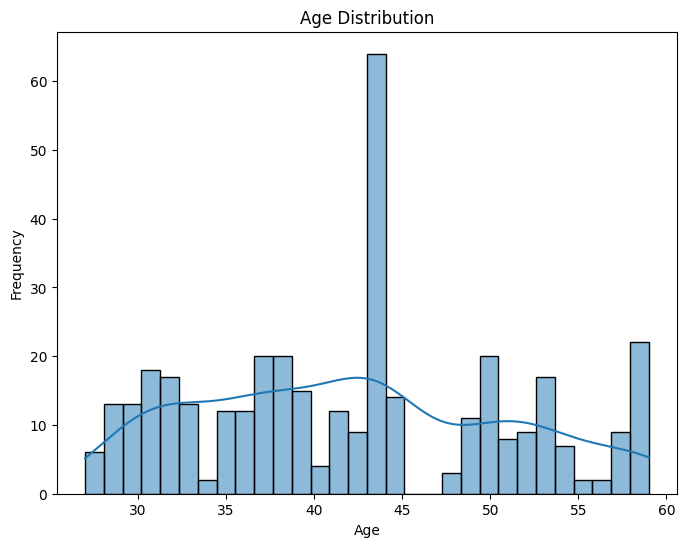

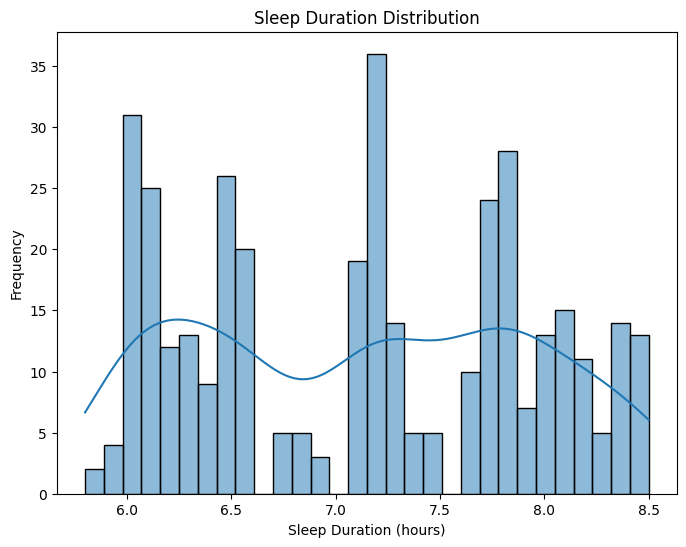

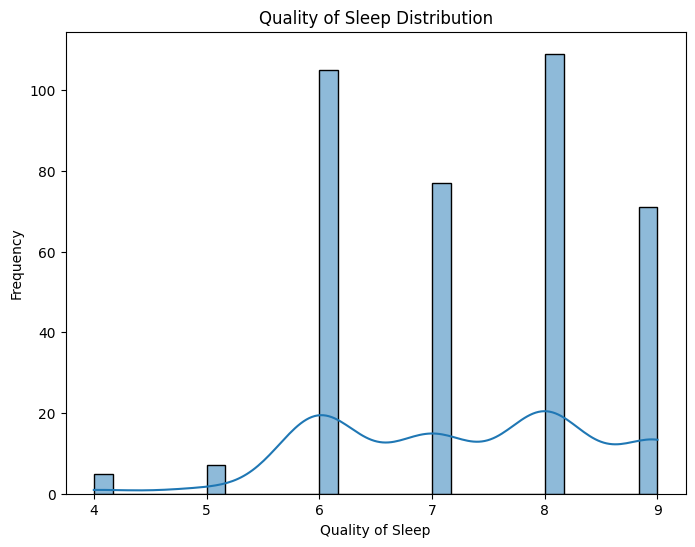

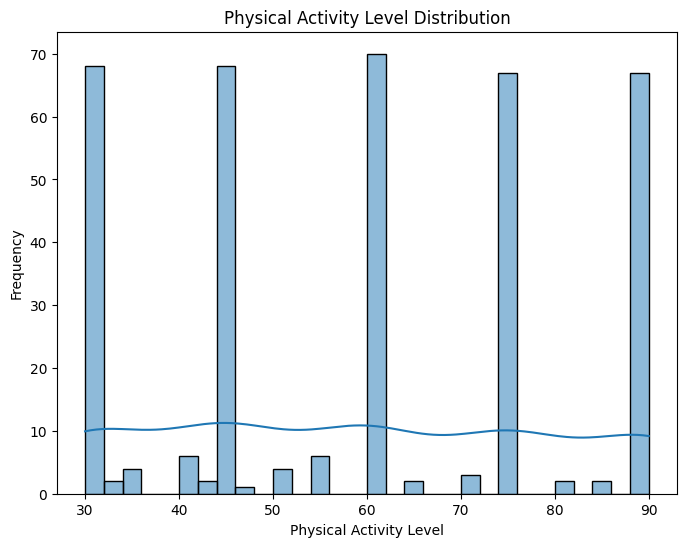

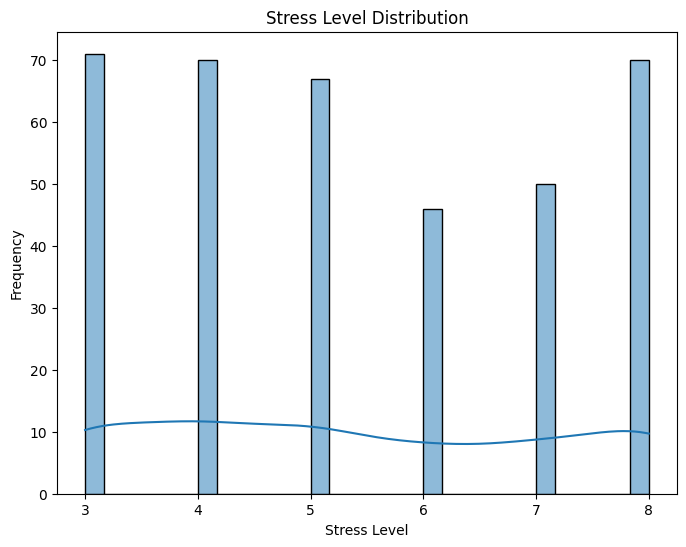

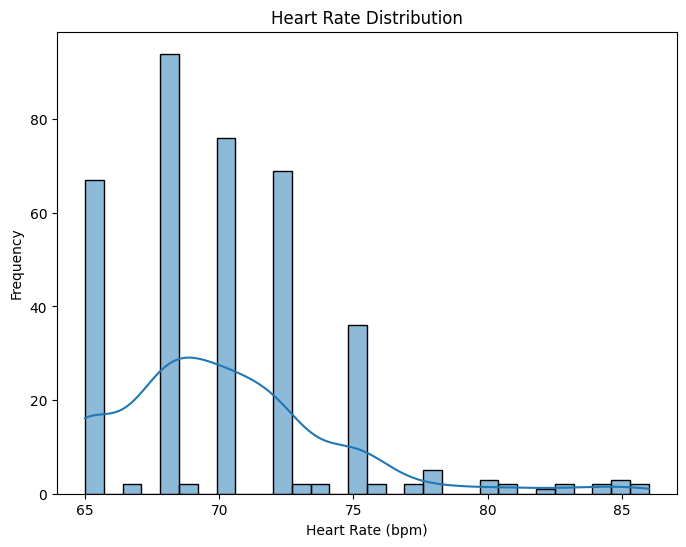

Pandas takes: 0.9115085601806641 seconds


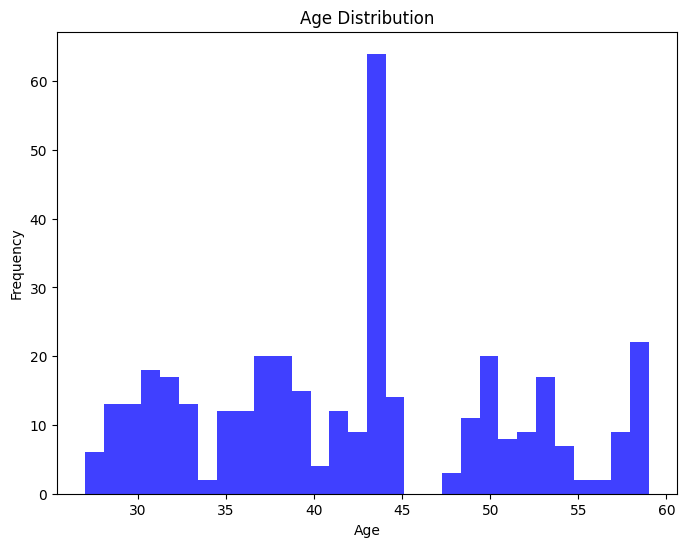

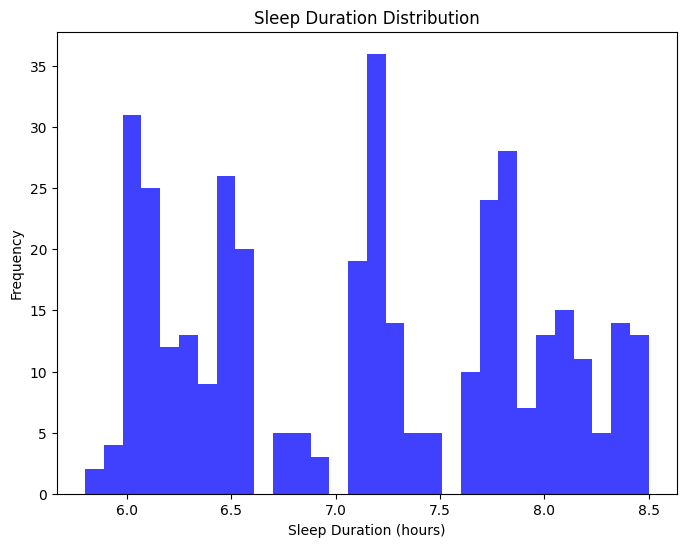

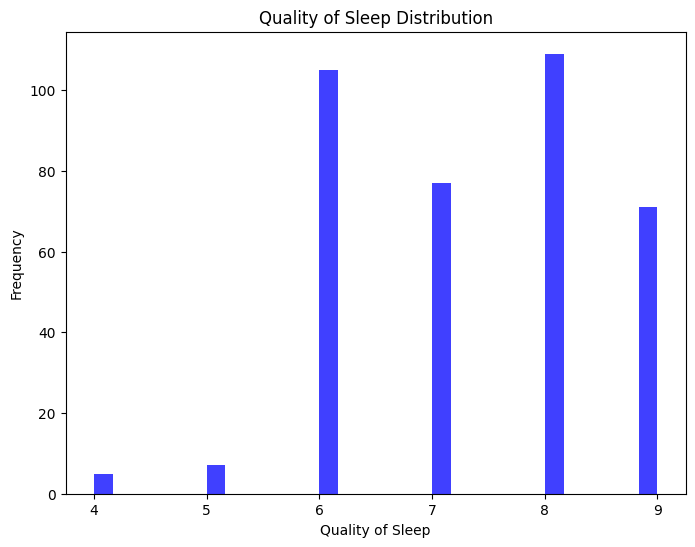

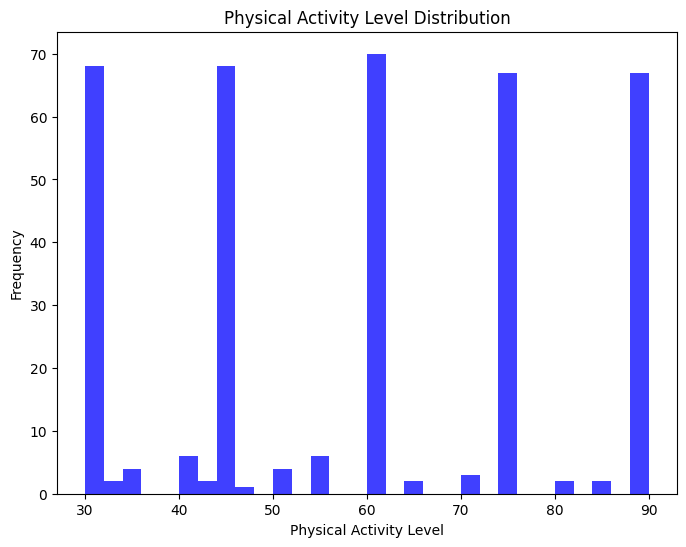

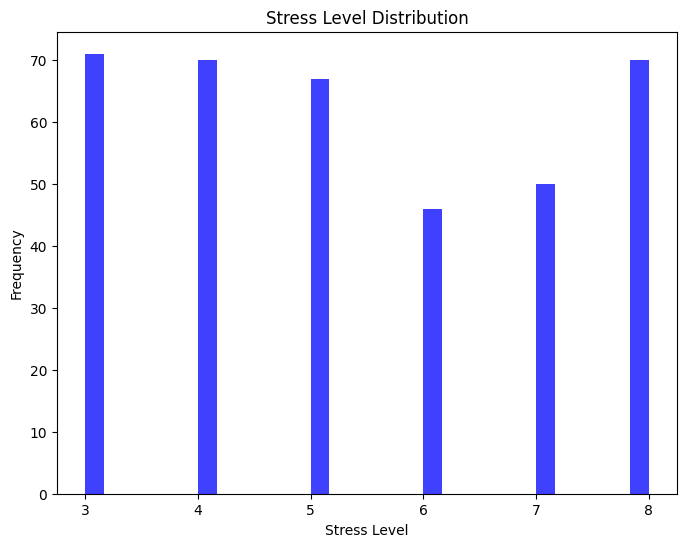

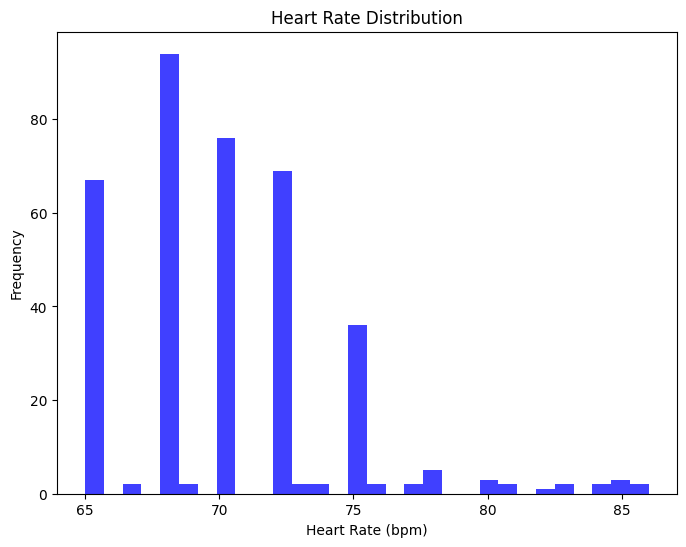

NumPy takes: 0.6963131427764893 seconds


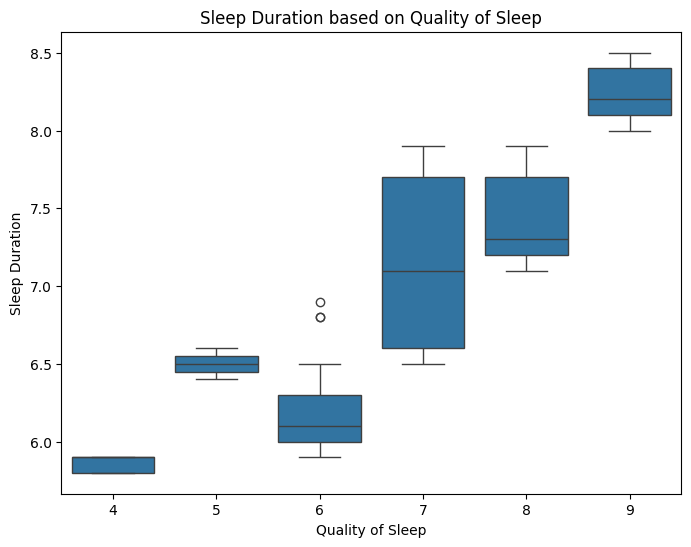

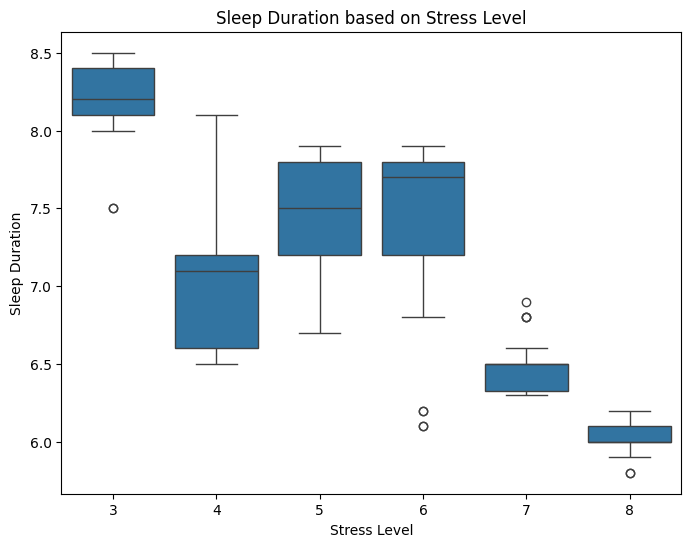

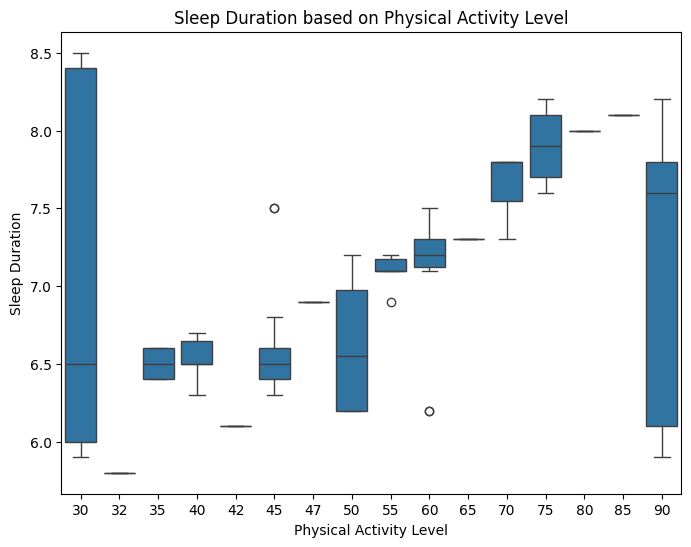

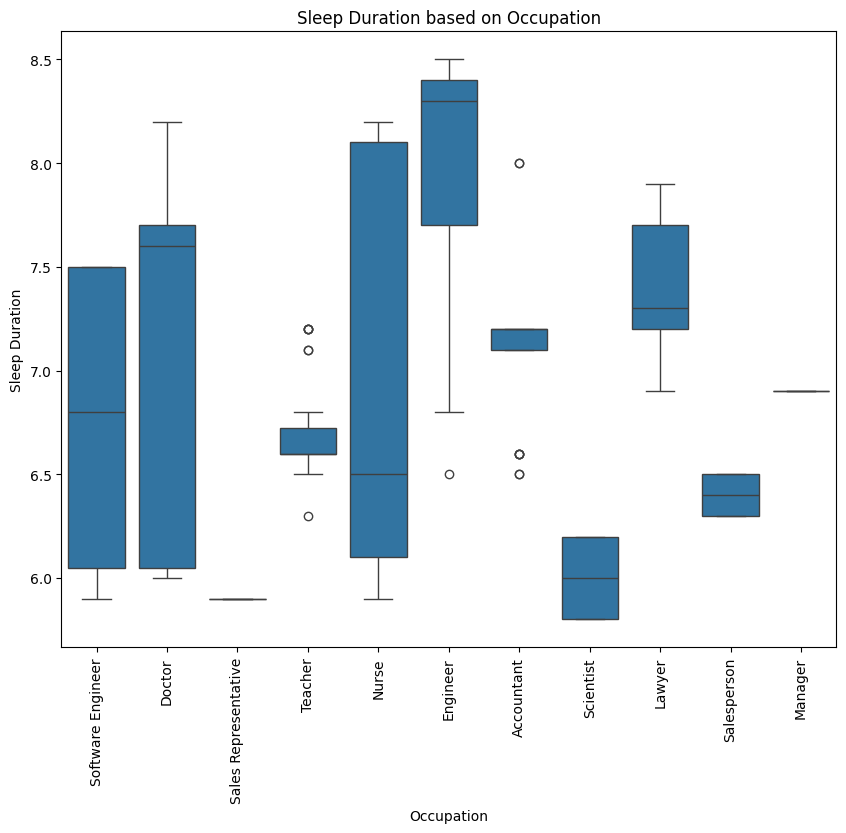

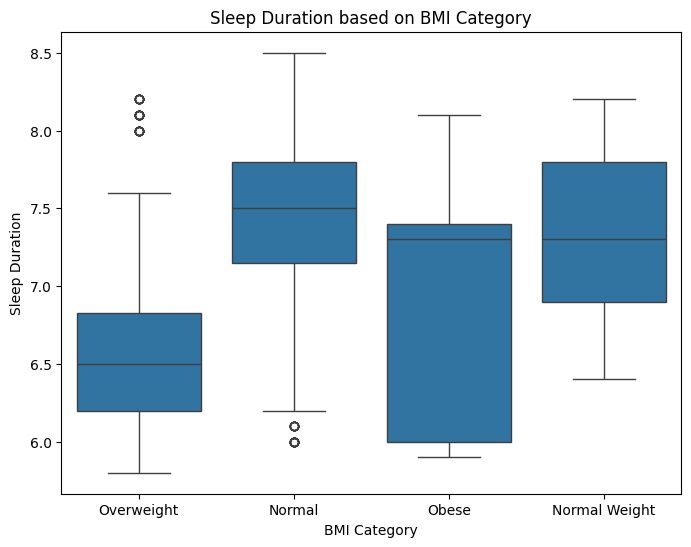

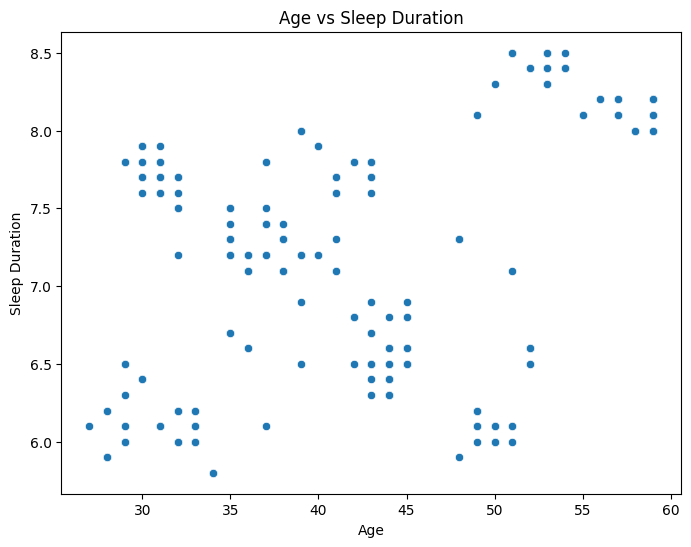

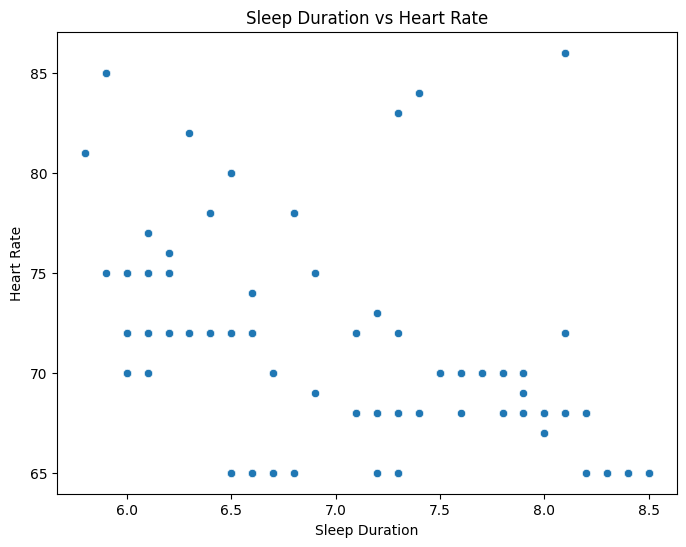

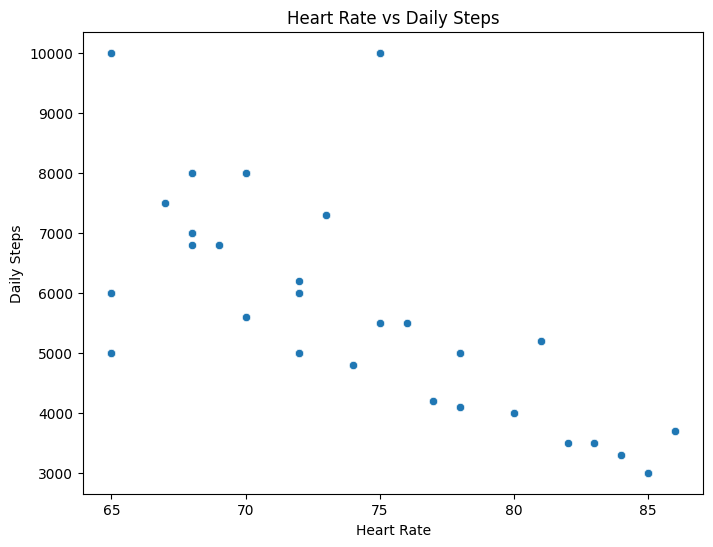

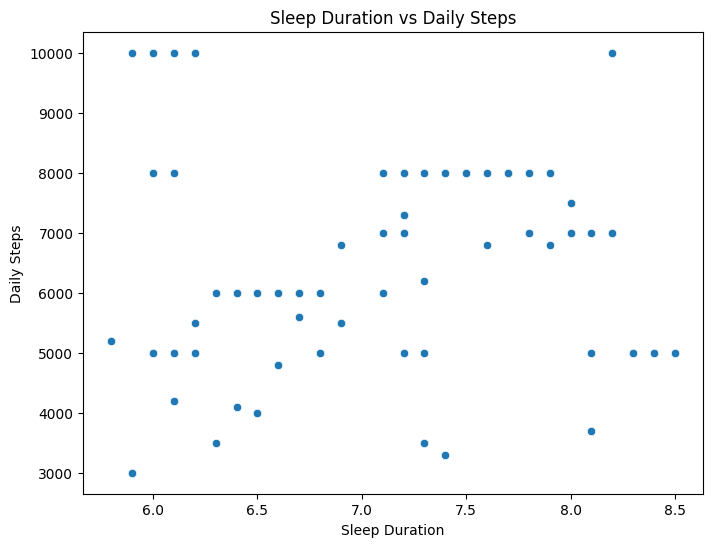

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

file_path = 'sleep_health.csv'
pandas_data = pd.read_csv(file_path)


start_time_pandas = time.time()

plt.figure(figsize=(8, 6))
sns.histplot(pandas_data['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(pandas_data['Sleep Duration'], kde=True, bins=30)
plt.title('Sleep Duration Distribution')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(pandas_data['Quality of Sleep'], kde=True, bins=30)
plt.title('Quality of Sleep Distribution')
plt.xlabel('Quality of Sleep')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(pandas_data['Physical Activity Level'], kde=True, bins=30)
plt.title('Physical Activity Level Distribution')
plt.xlabel('Physical Activity Level')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(pandas_data['Stress Level'], kde=True, bins=30)
plt.title('Stress Level Distribution')
plt.xlabel('Stress Level')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(pandas_data['Heart Rate'], kde=True, bins=30)
plt.title('Heart Rate Distribution')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Frequency')
plt.show()

end_time_pandas = time.time()
pandas_time = end_time_pandas - start_time_pandas
print(f"Pandas takes: {pandas_time} seconds")


numpy_data = np.genfromtxt(file_path, delimiter=',', skip_header=1)

start_time_numpy = time.time()

plt.figure(figsize=(8, 6))
plt.hist(numpy_data[:, 2], bins=30, alpha=0.75, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(numpy_data[:, 4], bins=30, alpha=0.75, color='blue')
plt.title('Sleep Duration Distribution')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(numpy_data[:, 5], bins=30, alpha=0.75, color='blue')
plt.title('Quality of Sleep Distribution')
plt.xlabel('Quality of Sleep')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(numpy_data[:, 6], bins=30, alpha=0.75, color='blue')
plt.title('Physical Activity Level Distribution')
plt.xlabel('Physical Activity Level')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(numpy_data[:, 7], bins=30, alpha=0.75, color='blue')
plt.title('Stress Level Distribution')
plt.xlabel('Stress Level')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(numpy_data[:, 11], bins=30, alpha=0.75, color='blue')
plt.title('Heart Rate Distribution')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Frequency')
plt.show()

end_time_numpy = time.time()
numpy_time = end_time_numpy - start_time_numpy
print(f"NumPy takes: {numpy_time} seconds")


plt.figure(figsize=(8, 6))
sns.boxplot(x='Quality of Sleep', y='Sleep Duration', data=pandas_data)
plt.title('Sleep Duration based on Quality of Sleep')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Stress Level', y='Sleep Duration', data=pandas_data)
plt.title('Sleep Duration based on Stress Level')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Physical Activity Level', y='Sleep Duration', data=pandas_data)
plt.title('Sleep Duration based on Physical Activity Level')
plt.show()

plt.figure(figsize=(10, 8))
sns.boxplot(x='Occupation', y='Sleep Duration', data=pandas_data)
plt.title('Sleep Duration based on Occupation')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='BMI Category', y='Sleep Duration', data=pandas_data)
plt.title('Sleep Duration based on BMI Category')
plt.show()


plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Sleep Duration', data=pandas_data)
plt.title('Age vs Sleep Duration')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sleep Duration', y='Heart Rate', data=pandas_data)
plt.title('Sleep Duration vs Heart Rate')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Heart Rate', y='Daily Steps', data=pandas_data)
plt.title('Heart Rate vs Daily Steps')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sleep Duration', y='Daily Steps', data=pandas_data)
plt.title('Sleep Duration vs Daily Steps')
plt.show()

AIM #4: Other possible plotting

1. Think of other possible plots to show some interesting distribution and relations. Do this using both pandas and NumPy



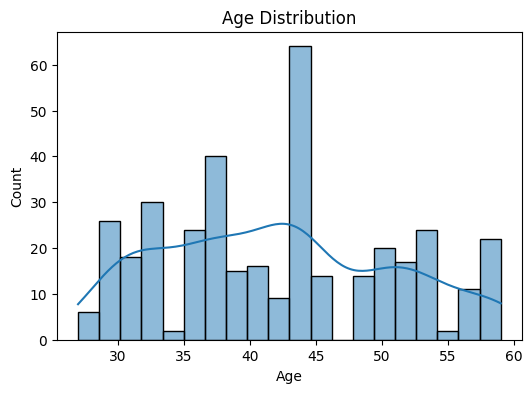

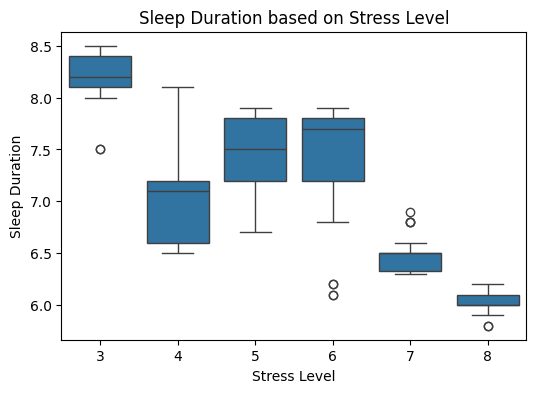

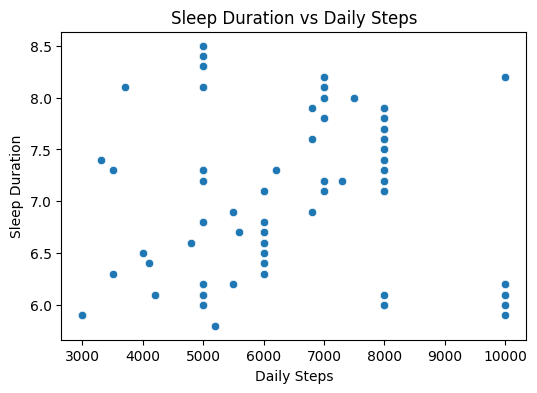

Total time for Pandas plotting: 0.7199521064758301 seconds


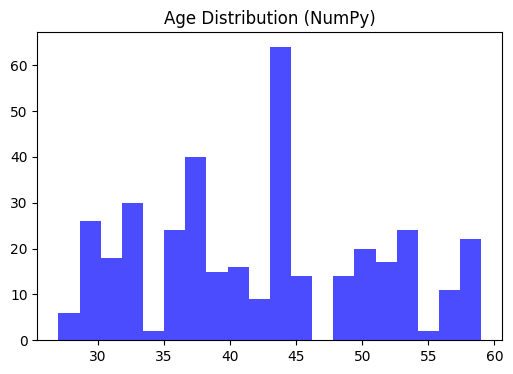

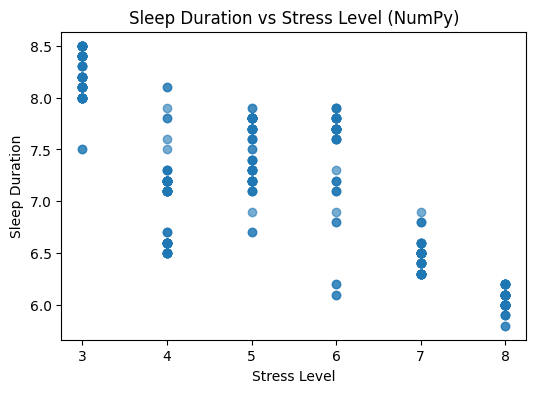

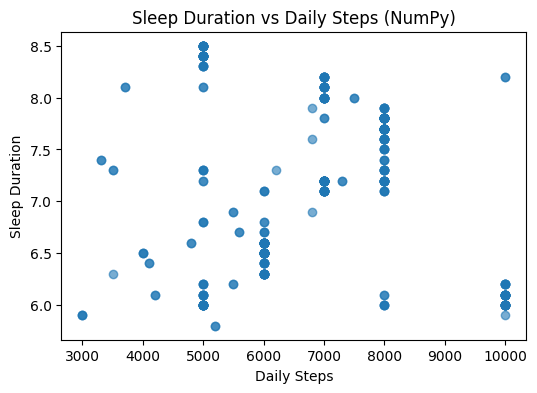

Total time for NumPy plotting: 0.5665988922119141 seconds
Time comparison: 
Pandas: 0.7199521064758301 seconds
NumPy: 0.5665988922119141 seconds


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

file_path = 'sleep_health.csv'
pandas_data = pd.read_csv(file_path)

start_time_pandas = time.time()

plt.figure(figsize=(6, 4))
sns.histplot(pandas_data['Age'], kde=True, bins=20)
plt.title('Age Distribution')
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x='Stress Level', y='Sleep Duration', data=pandas_data)
plt.title('Sleep Duration based on Stress Level')
plt.show()

plt.figure(figsize=(6, 4))
sns.scatterplot(x='Daily Steps', y='Sleep Duration', data=pandas_data)
plt.title('Sleep Duration vs Daily Steps')
plt.show()

end_time_pandas = time.time()
pandas_time = end_time_pandas - start_time_pandas
print(f"Total time for Pandas plotting: {pandas_time} seconds")

numpy_data = np.genfromtxt(file_path, delimiter=',', skip_header=1)

start_time_numpy = time.time()

plt.figure(figsize=(6, 4))
plt.hist(numpy_data[:, 2], bins=20, alpha=0.7, color='blue')
plt.title('Age Distribution (NumPy)')
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(numpy_data[:, 7], numpy_data[:, 4], alpha=0.6)
plt.title('Sleep Duration vs Stress Level (NumPy)')
plt.xlabel('Stress Level')
plt.ylabel('Sleep Duration')
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(numpy_data[:, 12], numpy_data[:, 4], alpha=0.6)
plt.title('Sleep Duration vs Daily Steps (NumPy)')
plt.xlabel('Daily Steps')
plt.ylabel('Sleep Duration')
plt.show()

end_time_numpy = time.time()
numpy_time = end_time_numpy - start_time_numpy
print(f"Total time for NumPy plotting: {numpy_time} seconds")

print(f"Time comparison: \nPandas: {pandas_time} seconds\nNumPy: {numpy_time} seconds")